# Plotting using Seaborn

Also see [the full gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html).

<a href="http://stanford.edu/~mwaskom/software/seaborn/examples/index.html">
<img src="figures/seaborn_gallery.png" style="float: left; width: 40%;"/>
</a>

In [2]:
#plots the figures in place
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

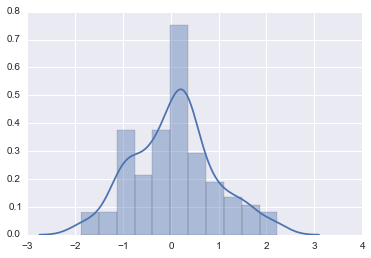

In [8]:
#create 100 random normally distributed values
x = np.random.normal(size=100)


sns.distplot(x);

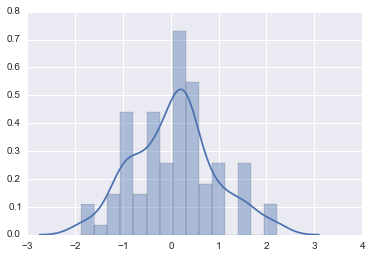

C:\Users\AK113797\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


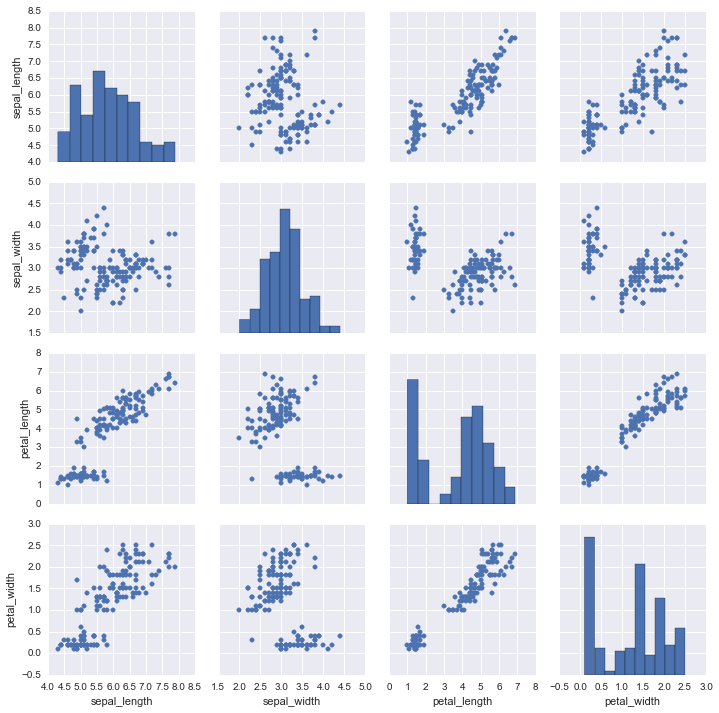

In [12]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

## Interactive plots

In [40]:
from IPython.html.widgets import interact, interact_manual

In [27]:
@interact(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

asdfasdf 30 True green


In [41]:
@interact_manual(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 50 True red


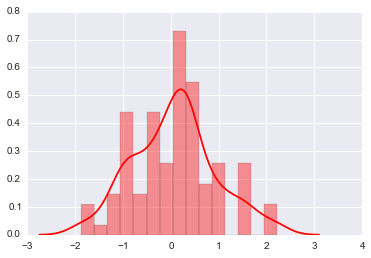

In [22]:
@interact(bins=(5, 25, 5),color=['red','green','orange','blue'])
def show_distplot(bins,color):
    sns.distplot(x, bins=bins, color=color);

# custom build widgets:

http://nbviewer.ipython.org/github/ipython/ipython/blob/3.x/examples/Interactive%20Widgets/Widget%20List.ipynb 

In [59]:
#hard core

from IPython.html import widgets

[widget for widget in dir(widgets) if not widget.endswith('Widget') and widget[0] == widget[0].upper() and widget[0] != '_']

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'Dropdown',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Latex',
 'Output',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox']

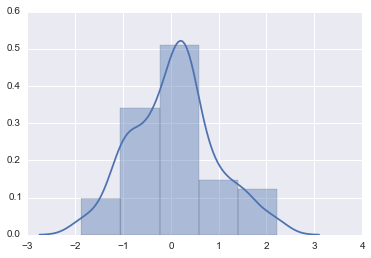

In [32]:
@interact(bins=widgets.FloatTextWidget(value=5))
def show_distplot(bins):
    sns.distplot(x, bins=bins);

In [60]:
text_widget = widgets.Textarea(value='Hello', description='text area')
slider_widget = widgets.BoundedFloatText(5,min=0,max=10, description='slider area')
check_widget = widgets.Checkbox(True,description="CheckboxWidget")
toggle = widgets.RadioButtons(options=['red','green','blue'], description="RadioButtonsWidget")

@interact(text=text_widget, slider=slider_widget,check=check_widget,categories=toggle)
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 10.0 True red


In [81]:
b = widgets.Button(description="Update")
checkbox = widgets.Checkbox(description="CheckboxWidget")

tab1_children = [b,
                 checkbox,
                 widgets.Dropdown(options=['A','B'], description="DropdownWidget"),
                 widgets.RadioButtons(options=['A','B'], description="RadioButtonsWidget"),
                 widgets.Select(options=['A','B'], description="SelectWidget"),
                 widgets.Text(description="TextWidget"),
                 widgets.Textarea(description="TextareaWidget"),
                 widgets.ToggleButton(description="ToggleButtonWidget"),
                 widgets.ToggleButtons(options=["Value 1", "Value2"], description="ToggleButtonsWidget"),
                 ]

tab2_children = [widgets.BoundedFloatText(description="BoundedFloatTextWidget"),
                 widgets.BoundedIntText(description="BoundedIntTextWidget"),
                 widgets.FloatSlider(description="FloatSliderWidget"),
                 widgets.FloatText(description="FloatTextWidget"),
                 widgets.IntSlider(description="IntSliderWidget"),
                 widgets.IntText(description="IntTextWidget"),
                 ]

tab1 = widgets.ContainerWidget(children=tab1_children)
tab2 = widgets.ContainerWidget(children=tab2_children)


i = widgets.AccordionWidget(children=[tab1, tab2])

i.set_title(0,"Basic Widgets")
i.set_title(1,"Numbers Input")

from IPython.display import display

def button_clicked(bb):
    print(checkbox.value)
    #TODO update plot

b.on_click(button_clicked)

display(i)